<img src='casa.jpg'></img>
<center><h1>Uma breve conjectura</h1></center>

Achar a casa ideal é tão difícil quanto conseguir a paz mundial. Diversos fatores influenciam no momento de escolher sua nova residência: quão perto do trabalho ela está; se tem escolas e hospitais perto; se a vizinhança é boa; quantidade de quartos, banheiros; e muitas outras razões. Indubitavelmente, o valor de uma casa tem uma influência forte sobre a decisão do comprador, afinal, <a href='http://g1.globo.com/economia/negocios/noticia/2016/03/lucro-da-caixa-economica-sobe-para-r-72-bilhoes-em-2015.html'>não é a toa que a quantidade de financiamentos no Brasil terem aumentado no último ano</a>.
<br>
<br>
Contudo, e se fosse possível prevermos o preço que uma casa vale? Certamente a influência na decisão do comprador seria acentuada, principalmente se você é uma empresa que oferece esse tipo de serviço. Imagine ser possível auxiliar um cliente, garantindo a ele dados como, preço médio por região, valor que uma casa com determinadas caracterítiscas (quantidade de quartos, banheiros, e tamanho da casa, por exemplo) vale. Certamente a marca da empresa seria fortalecida e o engajamento aprimorado.

<h2>Prevendo preço de casa nos Estados Unidos</h2>

Nesta apresentação irei mostrar um modelo de Machine Learning que tem como objetivo prever o preço de uma casa. Graças ao <i>dataset</i> a seguir - que conta com diversas características de mais de 18 mil casas nos EUA -, é possível desenvolvermos tal modelo.

In [448]:
#Realizando importação das bibliotecas que serão utilizadas

import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import folium
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Configurações de parâmetros do Matplotlib
plt.rcParams['figure.figsize'] = (11, 7)
%matplotlib inline

<h2>Explorando dados</h2>

Primeiro, iniciamos a leitura de nosso <i>dataset</i> e exibimos as primeiras linhas dele. Isso nos permitirá ter uma visão clara dos dados que estamos trabalhando. Em seguida, mostro algumas estatísticas referentes aos dados, como valores médios, desvio padrão, quartis, dentre outros.

In [449]:
#Leitura do arquivo de conjunto de dados
dataframe = pd.read_csv('house_sales.csv')

#Cinco primeiras linhas do arquivo
dataframe.head()

,price,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,year_built,renovation_date,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot
0,221900,3,1.00,1180,5650,1.0,0,3,0,1955,0,98178,47.511234,-122.256775,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,3,400,1951,1991,98125,47.721023,-122.318862,1690,7639
2,180000,2,1.00,770,10000,1.0,0,3,0,1933,0,98028,47.737927,-122.233196,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,5,910,1965,0,98136,47.520820,-122.393185,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,3,0,1987,0,98074,47.616812,-122.044901,1800,7503


In [450]:
print('Este DataFrame possui {} linhas e {} colunas.'.format(dataframe.shape[0], dataframe.shape[1]))

Este DataFrame possui 18448 linhas e 16 colunas.


Como pode ser visto acima, o arquivo conta com informações de 18448 casas dos Estados Unidos, informações suficientes para a geração de um bom modelo de predição. Abaixo, mostro algumas estatísticas do <i>dataset</i>. É interessante observar que não há valores nulos nele, o que nos remete ao pensamento de que este conjunto de dados foi muito bem tratado e produzido.

In [451]:
dataframe.describe()

,price,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,year_built,renovation_date,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot
count,1.844800e+04,18448.000000,18448.000000,18448.000000,1.844800e+04,18448.000000,18448.000000,18448.000000,18448.000000,18448.000000,18448.000000,18448.000000,18448.000000,18448.000000,18448.000000,18448.000000
mean,5.423624e+05,3.372615,2.118888,2083.940915,1.503602e+04,1.494606,0.007643,3.411698,293.571498,1971.001138,85.145002,98077.921455,47.560030,-122.214419,1988.306483,12571.596216
std,3.720135e+05,0.933892,0.772384,921.416218,4.181455e+04,0.540806,0.087092,0.652593,443.607503,29.361619,403.371263,53.497440,0.138557,0.139910,686.173124,26329.260211
min,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,0.000000,1900.000000,0.000000,98001.000000,47.155933,-122.518648,399.000000,651.000000
25%,3.218375e+05,3.000000,1.750000,1430.000000,5.050000e+03,1.000000,0.000000,3.000000,0.000000,1952.000000,0.000000,98033.000000,47.471527,-122.328084,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.600500e+03,1.500000,0.000000,3.000000,0.000000,1975.000000,0.000000,98065.000000,47.571599,-122.230688,1840.000000,7611.000000
75%,6.480000e+05,4.000000,2.500000,2560.000000,1.062525e+04,2.000000,0.000000,4.000000,570.000000,1997.000000,0.000000,98118.000000,47.677918,-122.125733,2370.000000,10050.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777624,-121.315254,6110.000000,858132.000000


A fim de gerarmos o melhor modelo de predição possível, é necessário atentar-se se a bibloteca de análise Pandas está tratando devidamente os dados encontrados no <i>dataset</i>, como, por exemplo, atentar-se se todos os dados numéricos estão sendo tratados como número, ao invés de linhas de texto (<i>string</i>).

Por fim, podemos conferir abaixo que os dados estão sendo tratados corretamente.

In [452]:
dataframe.dtypes

price                         int64
num_bed                       int64
num_bath                    float64
size_house                    int64
size_lot                      int64
num_floors                  float64
is_waterfront                 int64
condition                     int64
size_basement                 int64
year_built                    int64
renovation_date               int64
zip                           int64
latitude                    float64
longitude                   float64
avg_size_neighbor_houses      int64
avg_size_neighbor_lot         int64
dtype: object

Seria interessante entender também como as casas estão distribuídas em um mapa. Isso nos possibilitaria analisas a distância entre um imóvel e outro, por exemplo. No exemplo abaixo, listei 100 casas presentes no conjunto de dados e pude perceber, por exemplo, que casas localizadas em ilhas como em <i>Mercer Island</i> possuem valores muito altos, onde residências são encontradas por até U$ 2 milhões. Fique a vontade para aproximar o mapa e alterar o valor da variável `quantidade_de_casas` para visualizar mais imóveis e seus preços.

In [453]:
#Pequena amostra de como as casas estão distribuidas
quantidade_de_casas = 100

map = folium.Map(location=[dataframe['latitude'].min(), dataframe['longitude'].max()], zoom_start=8)
for linha in dataframe[0:100].iterrows():
    folium.Marker([linha[1]['latitude'], linha[1]['longitude']], popup='Valor da casa: U$ {:0,.0f}'.format(linha[1]['price'])).add_to(map)
map

<h1>Criação do modelo de previsão</h1>

Agora que análisamos e conhecemos nossos dados, é hora de gerar nosso modelo de Machine Learning. Inicialmente, vou preparar os conjuntos de treino e teste, que alimentarão nosso modelo.

In [454]:
#Dividindo dados para geração do conjunto de teste e treino
y = dataframe['price']
#Retirando coluna de preço, o qual queremos prever no conjunto teste
x = dataframe.drop(['price'], axis=1)

Em seguida gero o conjunto de dados de treino e teste, além de seus <i>labels</i>. Por fim, crio o modelo.

In [455]:
#Criando conjunto de dados de teste e treino
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 42)

In [456]:
#Geração do modelo
modelo = LinearRegression().fit(X_train, y_train)

Pronto, nosso modelo está gerado, contudo, o trabalho não para por aí. Para saber se um modelo está funcionando corretamente, devemos verificar sua pontuação (<i>score</i>) em relação aos dados. Abaixo, eu realizo a análise dos <i>scores</i>.

In [457]:
#Score no conjunto de treino
modelo.score(X_train, y_train)

0.66649242164957911

In [458]:
#Score no conjunto de teste
modelo.score(X_test, y_test)

0.65439052010960796

Nada bom. Perceba que o <i>score</i> no conjunto de treino (67%) foi maior que no conjunto de teste (65%), isso caracteriza um problema de <i>Overfitting</i>, no qual o modelo não funciona corretamente quando tenta prever um dado que nunca viu.

Para entender esse problema, decidi visualizar os dados encontrados na coluna de preço. Neste caso, gerei um gráfico de histograma.

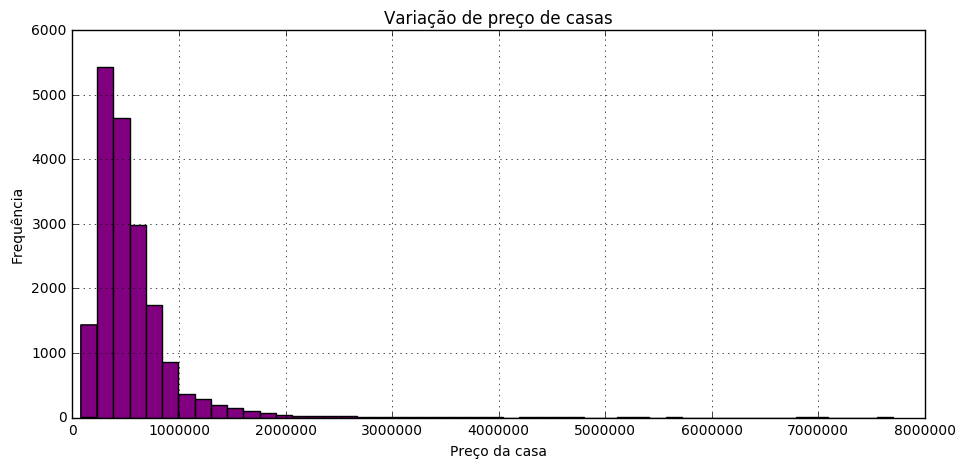

In [459]:
#Criando gráfico de histograma
plt.figure(figsize=(11, 5))
plt.hist(dataframe['price'], bins=50, color = 'purple')
plt.grid()
plt.xlabel('Preço da casa')
plt.ylabel('Frequência')
plt.title('Variação de preço de casas')
plt.show()

Parece que encontramos um dos nossos problemas. Perceba como os valores no gráfico estão em sua maioria a esquerda dele, possuindo uma parte acentuada na altura da frequência de 5000. Isso caracteriza nosso gráfico como positivamente enviesado, o que não é bom.

Para contornar isso, decidi usar a função `np.log` que calculará o logaritmo dos preços das casas. Isso tornará a distribuição do gráfico em uma Distribuição Normal.

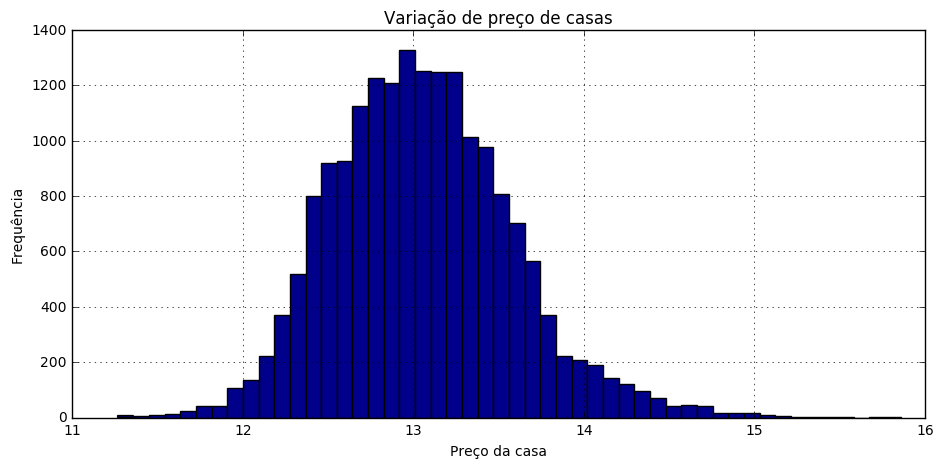

In [460]:
#Gerando gráfico com valores normalizados
plt.figure(figsize=(11, 5))
plt.hist(np.log(dataframe['price']), bins=50, color = 'darkblue')
plt.grid()
plt.xlabel('Preço da casa')
plt.ylabel('Frequência')
plt.title('Variação de preço de casas')
plt.show()

Feito isso, é hora de gerar nosso modelo novamente, agora utilizando a função `np.log` novamente. Em seguida, gero o modelo e visualizo os <i>scores</i>.

In [461]:
#Criando distruição normal dos dados com np.log
y = np.log(dataframe['price'])
#Retirando coluna de preço, o qual queremos prever
x = dataframe.drop(['price'], axis=1)

In [462]:
#Criando conjunto de dados de teste e treino
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 42)

In [463]:
#Gerando modelo
modelo = LinearRegression().fit(X_train, y_train)

In [464]:
#Score no conjunto de treino
modelo.score(X_train, y_train)

0.72658915875315588

In [465]:
#Score no conjunto de teste
modelo.score(X_test, y_test)

0.73019745991669582

Ficou bem melhor! Veja que agora o <i>score</i> do conjunto de teste é maior que no conjunto de treino, o que não caracteriza ele como <i>Overfitting</i>. Embora o resultado seja melhor que o anterior, há mais uma coisa que podemos fazer para melhorar o modelo: alterar `random_state`.

Para me ajudar nisso, eu preciso visualizar os dados. No código abaixo eu gero duas listas, que armazenará diferentes scores. Em seguida eu crio um `for loop` que irá gerar um modelo com um random_state de `0` a `99`, verificará o <i>score</i> e o armazenará na respectiva lista. Acompanhe.

In [466]:
#Tentando melhorar o modelo
precisao_conjunto_treino = []
precisao_conjunto_teste = []

for numero in range(100):
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = numero)
    modelo = LinearRegression().fit(X_train, y_train)
    
    precisao_conjunto_treino.append(modelo.score(X_train, y_train))
    precisao_conjunto_teste.append(modelo.score(X_test, y_test))

Agora que gerei a lista com sucesso, eu crio um gráfico que mostra como o número em random_state influênciou o resultado. E o resultado é interessante.

Como vemos no gráfico abaixo, o valor `81` gera o melhor resultado no conjunto de teste (quase 75%), enquanto gera um <i>score</i> de aproximadamente 72% no conjunto de treino. A partir dessa nova informação, eu crio novamente o modelo, que irá conseguir ter uma precisão maior.

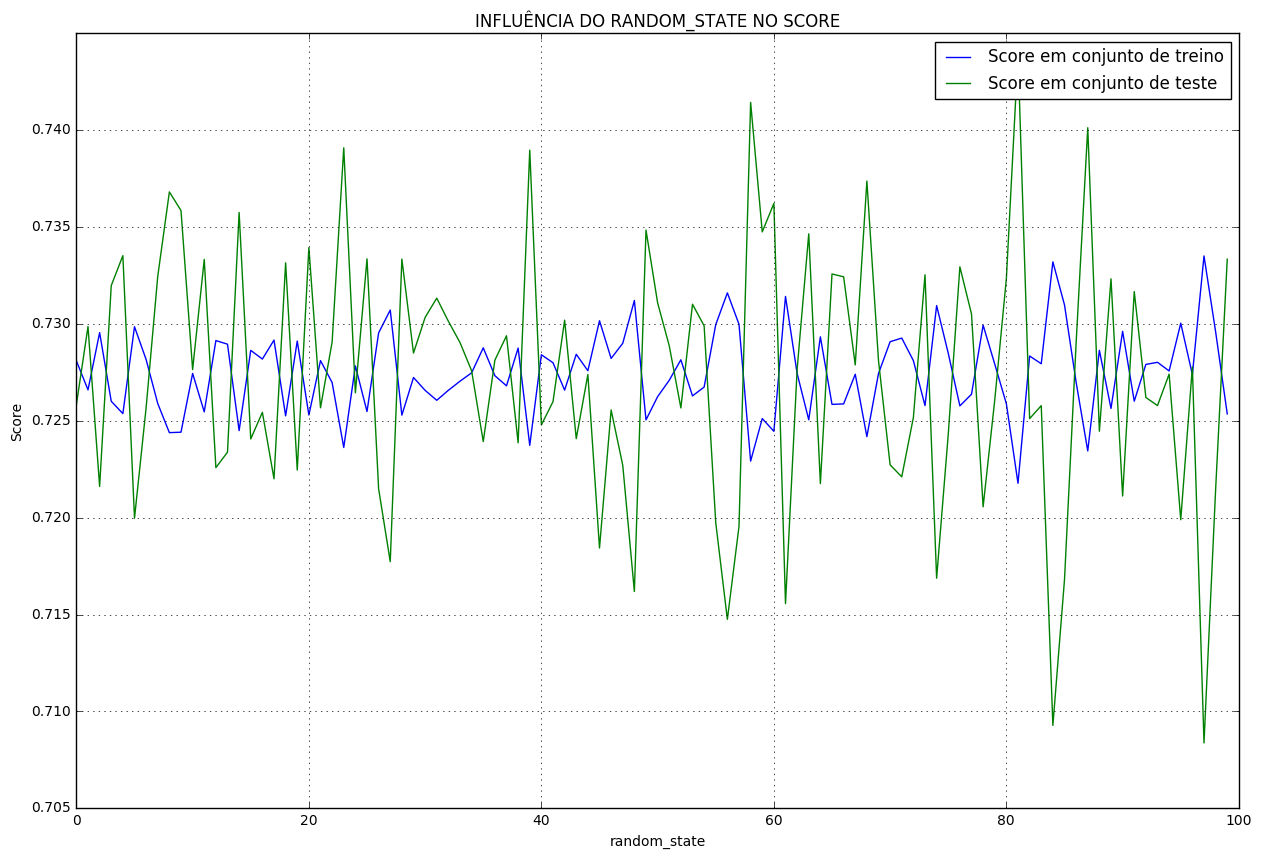

In [467]:
#Criando gráfico com cada 
plt.figure(figsize=(15, 10))
plt.grid()
plt.plot(precisao_conjunto_treino, label = 'Score em conjunto de treino')
plt.plot(precisao_conjunto_teste, label = 'Score em conjunto de teste')
plt.xlabel('random_state')
plt.ylabel('Score')
plt.title('INFLUÊNCIA DO RANDOM_STATE NO SCORE')
plt.legend()
plt.show()

In [468]:
#Armazenando em uma variável o melhor random_state e seu score
melhor_random_state = precisao_conjunto_teste.index(max(precisao_conjunto_teste))
melhor_score = max(precisao_conjunto_teste)

print('O melhor random_state é: {}; que gera um score de: {}'.format(melhor_random_state, melhor_score))

O melhor random_state é: 81; que gera um score de: 0.7439217676800695


In [469]:
#Treinando modelo com novos dados
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = melhor_random_state)
modelo = LinearRegression().fit(X_train, y_train)

In [471]:
#Mostrando valor sugerido de uma casa aleatória
preco_sugerido = modelo.predict(X_test)
preco_sugerido = np.exp(preco_sugerido)

print('Preço sugerido de venda: U$ {:0,.0f}'.format(int(preco_sugerido[random.randint(0, 100)])))

Preço sugerido de venda: U$ 368,624


<h1>O que eu faço com isso?</h1>

A verdade é que muitas dúvidas permeiam a cabeça daqueles que veem essa quantidade de gráficos e linhas de códigos. "O que vou fazer com isso?" e "Como isso vai me fazer dinheiro?" são algumas das dúvidas que vem a memória. Todavia, dentre as diversas aplicações que um modelo de predição destes pode prover, uma sugestão seria a seguinte: imagine que você possui um site de vendas de imóveis, onde pessoas te procuram e querem anunciar suas casas a venda. Com base nesse modelo, a partir das informações que o usuário digitar sobre sua residência (quantidade de quartos, localização, tamanho da casa, quantidade de banheiros, etc.) o sistema poderia sugerir um valor com base em outras casas de mesmas características na vizinhança, a fim de facilitar sua escolha sobre qual preço determinar sobre seu imóvel.
<br>
<br>
Obrigado pela atenção.<br>
<i>Paulo Vasconcellos</i><br>
Blog: https://paulovasconcellos.com.br